In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler



In [162]:
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)


In [163]:
df = pd.read_csv("machine_params_and_cost_v2.csv")

In [164]:
df.shape

(2000, 31)

In [165]:
df.describe()

,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost,ID
count,1960.00,1.96e+03,1964.00,1967.00,1969.00,1963.00,1.96e+03,1950.00,1955.00,1968.00,1960.00,1.97e+03,1957.00,1963.00,1960.00,1959.00,1.97e+03,1957.00,1977.00,1964.00,2000.00,2000.00,2000.00,2000.00,1966.00,1963.00,1959.00,1957.00,2000.00
mean,99.10,4.14e+05,160.66,30.93,121.62,516.63,2.14e+06,258.43,70.30,303.35,421.75,7.63e+05,351.99,166.63,822.62,354.76,4.54e+05,558.10,272.99,339.35,0.03,0.40,0.03,0.05,1040.60,2887.71,1112.66,698.42,999.50
std,39.51,1.76e+05,103.91,17.62,32.54,83.54,1.25e+06,157.43,23.46,49.19,91.56,1.70e+05,203.39,96.70,109.28,49.88,1.29e+05,317.56,130.86,15.94,0.17,0.49,0.17,0.22,336.87,1397.33,189.27,142.04,577.49
min,-5.89,1.13e+05,-4.79,-19.05,27.41,286.76,2.72e+05,5.02,18.69,159.16,177.12,3.83e+05,36.60,-1.81,493.03,215.57,2.00e+05,76.35,50.16,278.93,0.00,0.00,0.00,0.00,356.98,473.90,612.32,365.92,0.00
25%,74.86,2.98e+05,82.94,18.92,101.40,465.70,1.22e+06,136.73,54.84,272.76,367.53,6.61e+05,202.92,93.09,758.74,324.68,3.72e+05,314.60,159.30,328.25,0.00,0.00,0.00,0.00,789.12,1733.70,985.96,596.77,499.75
50%,97.08,3.85e+05,155.88,30.11,119.06,513.71,1.92e+06,253.35,69.22,301.71,417.39,7.73e+05,340.92,166.35,815.04,352.44,4.51e+05,547.05,271.76,339.26,0.00,0.00,0.00,0.00,995.24,2661.52,1137.73,702.08,999.50
75%,119.68,5.07e+05,230.08,41.58,139.35,561.65,2.85e+06,367.41,84.63,329.98,467.99,8.70e+05,489.61,234.27,880.06,380.45,5.23e+05,774.63,388.90,350.24,0.00,1.00,0.00,0.00,1275.79,3900.20,1266.22,798.29,1499.25
max,372.29,1.67e+06,909.03,143.61,346.74,1108.91,1.13e+07,1328.60,245.10,651.37,1087.58,1.87e+06,1746.72,815.58,1613.43,709.47,1.45e+06,2725.50,499.50,400.23,1.00,1.00,1.00,1.00,1950.90,6657.34,1442.03,1035.02,1999.00


In [166]:
df.columns

Index(['ag', 'bg', 'T1', 'V1', 'A1', 'P1', 'B1', 'T2', 'V2', 'A2', 'P2', 'B2',
       'T3', 'V3', 'A3', 'P3', 'B3', 'T4', 'V4', 'A4', 'P4', 'B4',
       'Contamination_Defect', 'Crystalisation_Defect', 'Ion_Diffusion_Defect',
       'Burnishing_Defect', 'm1_cost', 'm2_cost', 'm3_cost', 'm4_cost', 'ID'],
      dtype='object')

In [167]:
def machine_params_and_cost_v2(df, feature):
    counts = df[feature].value_counts()
    counts.plot(kind="bar")

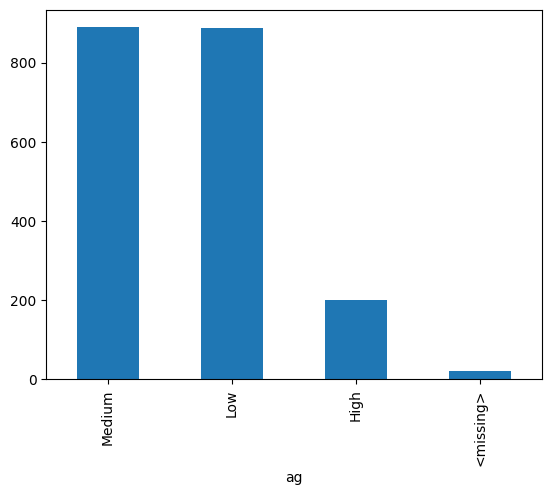

In [168]:
machine_params_and_cost_v2(df, "ag")


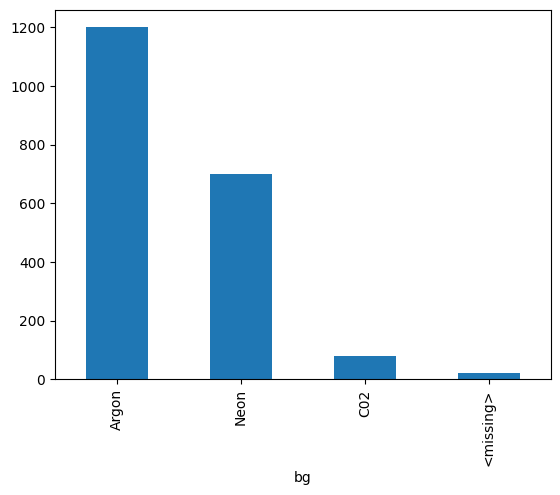

In [169]:
machine_params_and_cost_v2(df, "bg")

In [170]:
def count_ordinal_sns(df, feature):
    sns.countplot(y=feature, data=df)

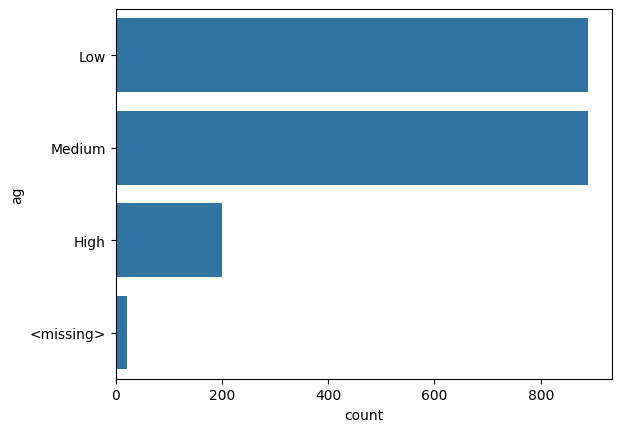

In [171]:
count_ordinal_sns(df, "ag")

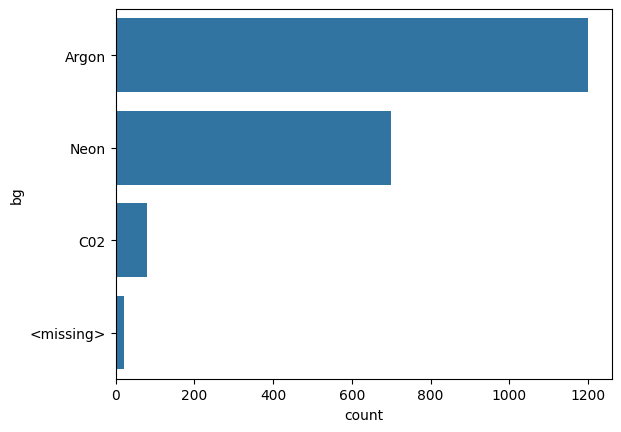

In [172]:
count_ordinal_sns(df, "bg")

In [173]:
df = df.replace("<missing>", np.nan)

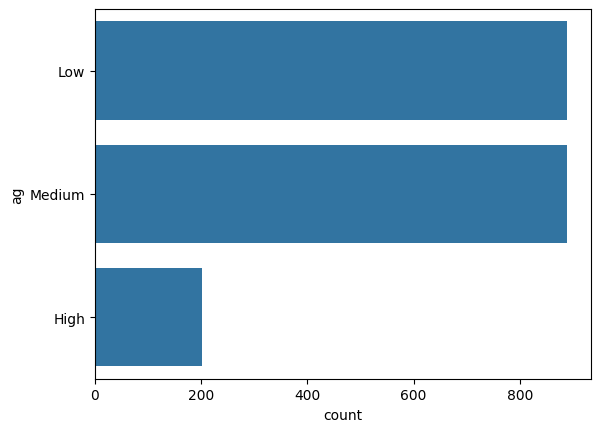

In [174]:
count_ordinal_sns(df, "ag")

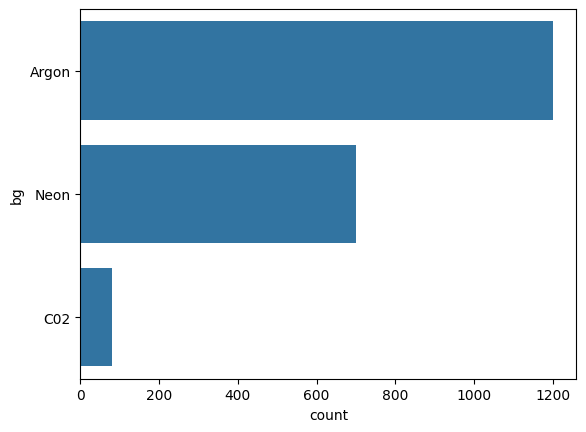

In [175]:
count_ordinal_sns(df, "bg")

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ag                     1978 non-null   object 
 1   bg                     1980 non-null   object 
 2   T1                     1960 non-null   float64
 3   V1                     1965 non-null   float64
 4   A1                     1964 non-null   float64
 5   P1                     1967 non-null   float64
 6   B1                     1969 non-null   float64
 7   T2                     1963 non-null   float64
 8   V2                     1965 non-null   float64
 9   A2                     1950 non-null   float64
 10  P2                     1955 non-null   float64
 11  B2                     1968 non-null   float64
 12  T3                     1960 non-null   float64
 13  V3                     1967 non-null   float64
 14  A3                     1957 non-null   float64
 15  P3  

In [177]:
df = df.drop(columns=["ID"])

In [178]:
df.describe()

,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost
count,1960.00,1.96e+03,1964.00,1967.00,1969.00,1963.00,1.96e+03,1950.00,1955.00,1968.00,1960.00,1.97e+03,1957.00,1963.00,1960.00,1959.00,1.97e+03,1957.00,1977.00,1964.00,2000.00,2000.00,2000.00,2000.00,1966.00,1963.00,1959.00,1957.00
mean,99.10,4.14e+05,160.66,30.93,121.62,516.63,2.14e+06,258.43,70.30,303.35,421.75,7.63e+05,351.99,166.63,822.62,354.76,4.54e+05,558.10,272.99,339.35,0.03,0.40,0.03,0.05,1040.60,2887.71,1112.66,698.42
std,39.51,1.76e+05,103.91,17.62,32.54,83.54,1.25e+06,157.43,23.46,49.19,91.56,1.70e+05,203.39,96.70,109.28,49.88,1.29e+05,317.56,130.86,15.94,0.17,0.49,0.17,0.22,336.87,1397.33,189.27,142.04
min,-5.89,1.13e+05,-4.79,-19.05,27.41,286.76,2.72e+05,5.02,18.69,159.16,177.12,3.83e+05,36.60,-1.81,493.03,215.57,2.00e+05,76.35,50.16,278.93,0.00,0.00,0.00,0.00,356.98,473.90,612.32,365.92
25%,74.86,2.98e+05,82.94,18.92,101.40,465.70,1.22e+06,136.73,54.84,272.76,367.53,6.61e+05,202.92,93.09,758.74,324.68,3.72e+05,314.60,159.30,328.25,0.00,0.00,0.00,0.00,789.12,1733.70,985.96,596.77
50%,97.08,3.85e+05,155.88,30.11,119.06,513.71,1.92e+06,253.35,69.22,301.71,417.39,7.73e+05,340.92,166.35,815.04,352.44,4.51e+05,547.05,271.76,339.26,0.00,0.00,0.00,0.00,995.24,2661.52,1137.73,702.08
75%,119.68,5.07e+05,230.08,41.58,139.35,561.65,2.85e+06,367.41,84.63,329.98,467.99,8.70e+05,489.61,234.27,880.06,380.45,5.23e+05,774.63,388.90,350.24,0.00,1.00,0.00,0.00,1275.79,3900.20,1266.22,798.29
max,372.29,1.67e+06,909.03,143.61,346.74,1108.91,1.13e+07,1328.60,245.10,651.37,1087.58,1.87e+06,1746.72,815.58,1613.43,709.47,1.45e+06,2725.50,499.50,400.23,1.00,1.00,1.00,1.00,1950.90,6657.34,1442.03,1035.02


<Axes: >

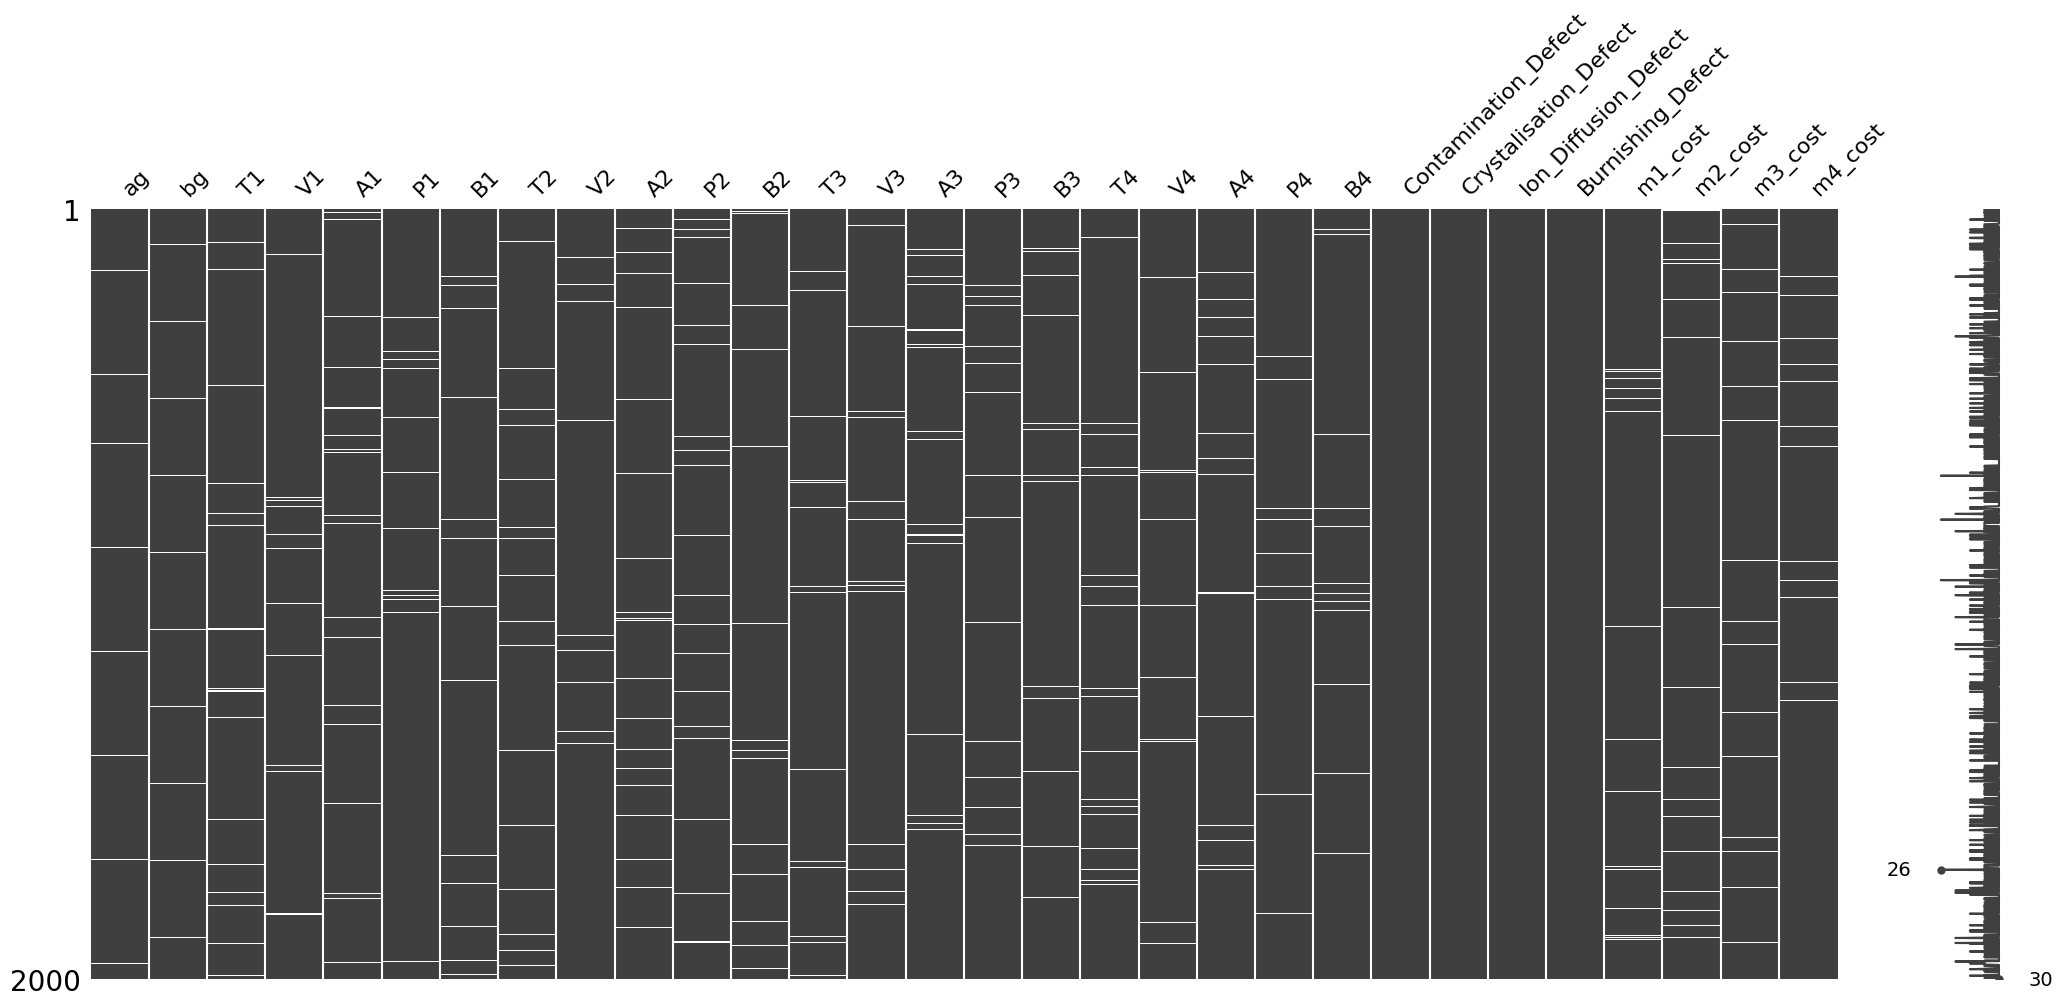

In [179]:
msno.matrix(df)

<Axes: >

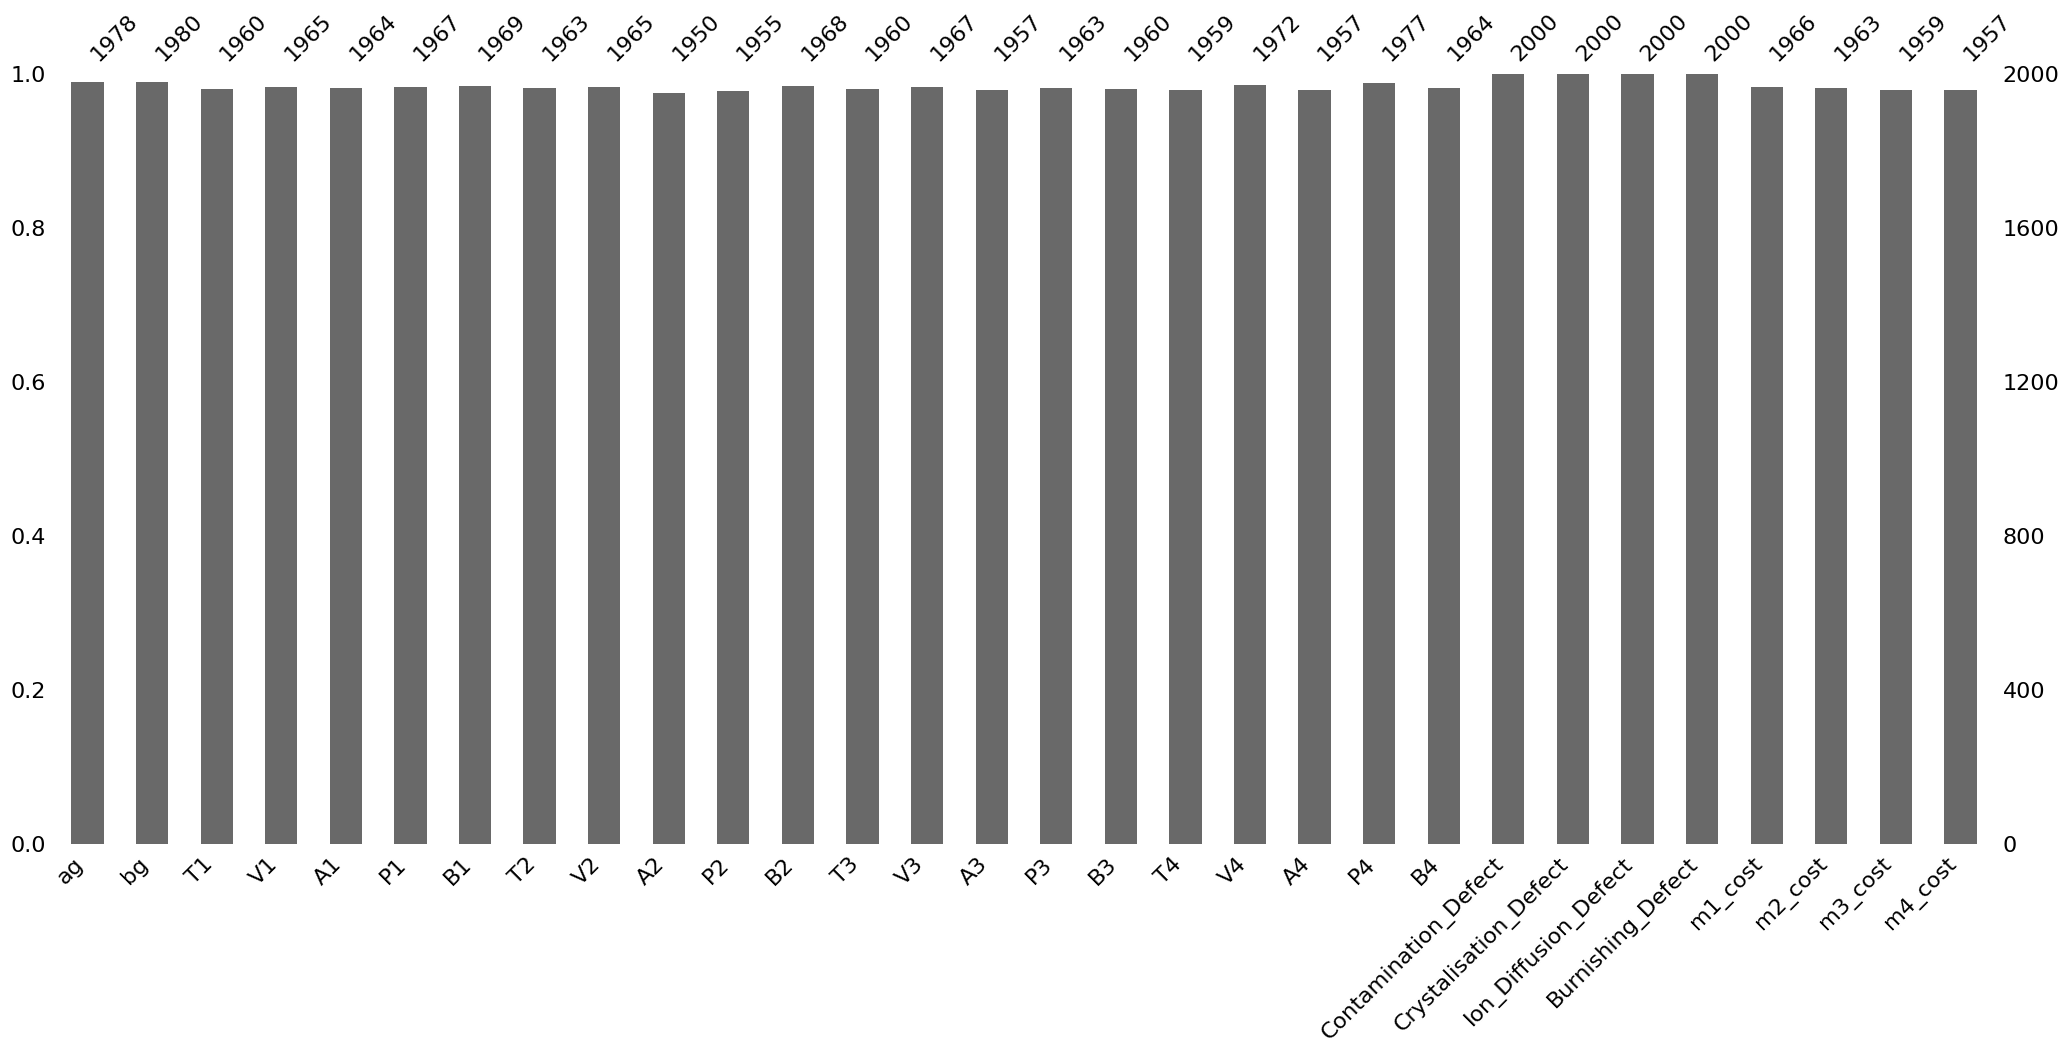

In [180]:
msno.bar(df)

<Axes: >

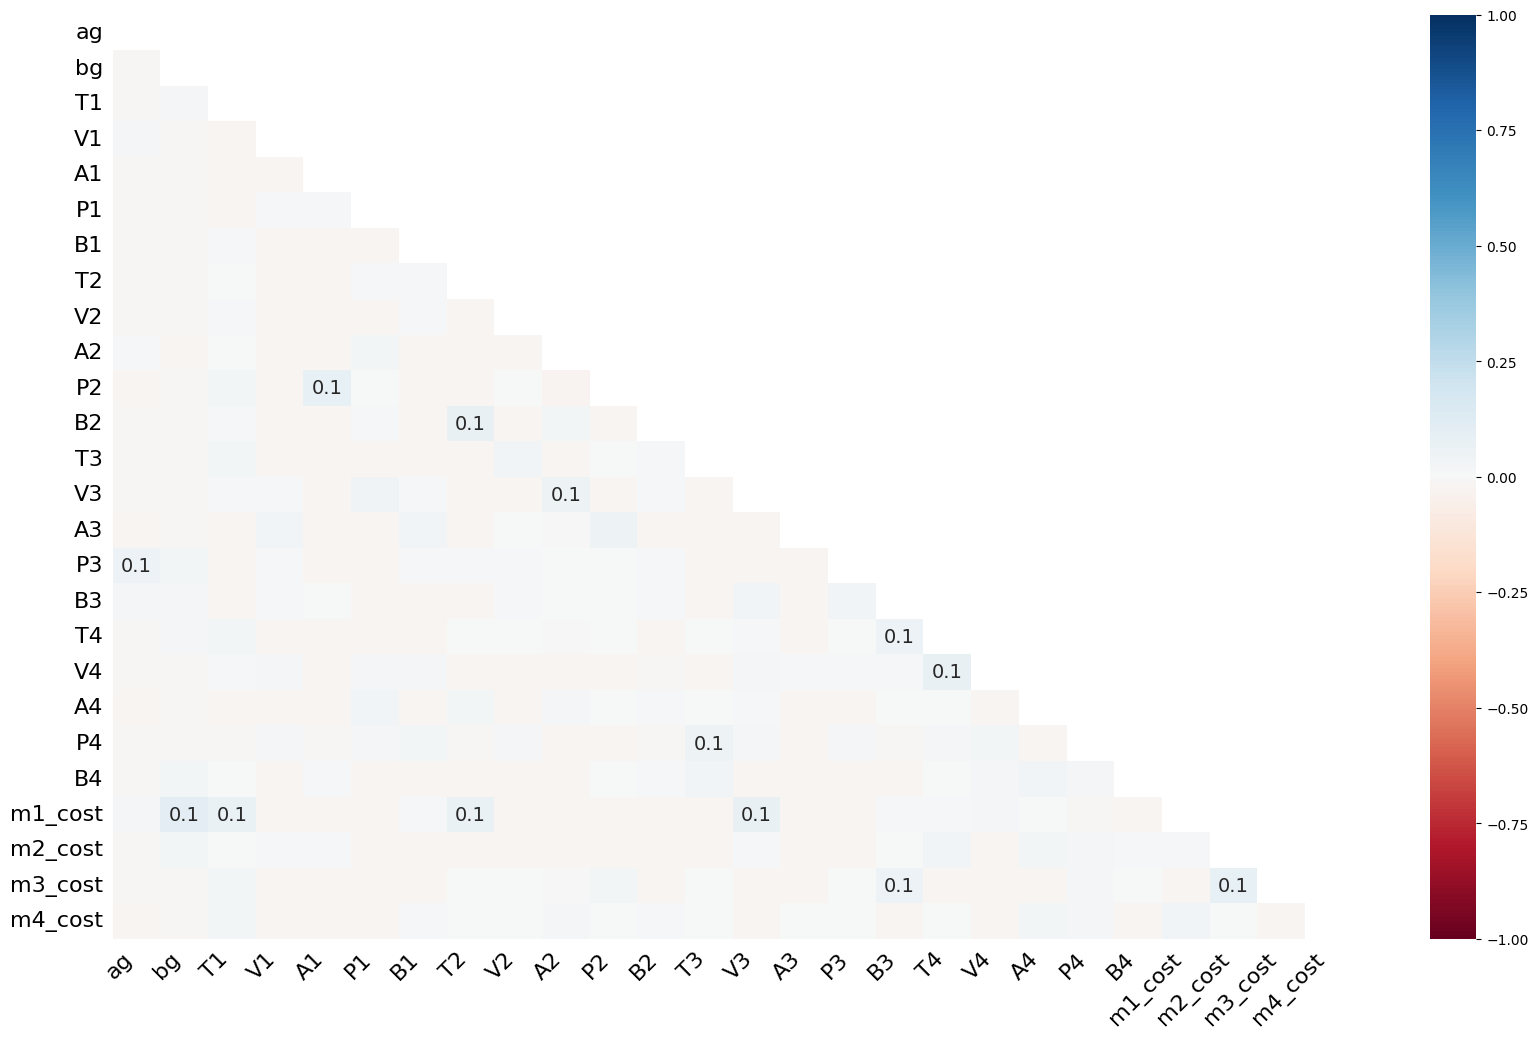

In [181]:
msno.heatmap(df)

In [182]:
df_no_na = df.dropna()

<Axes: >

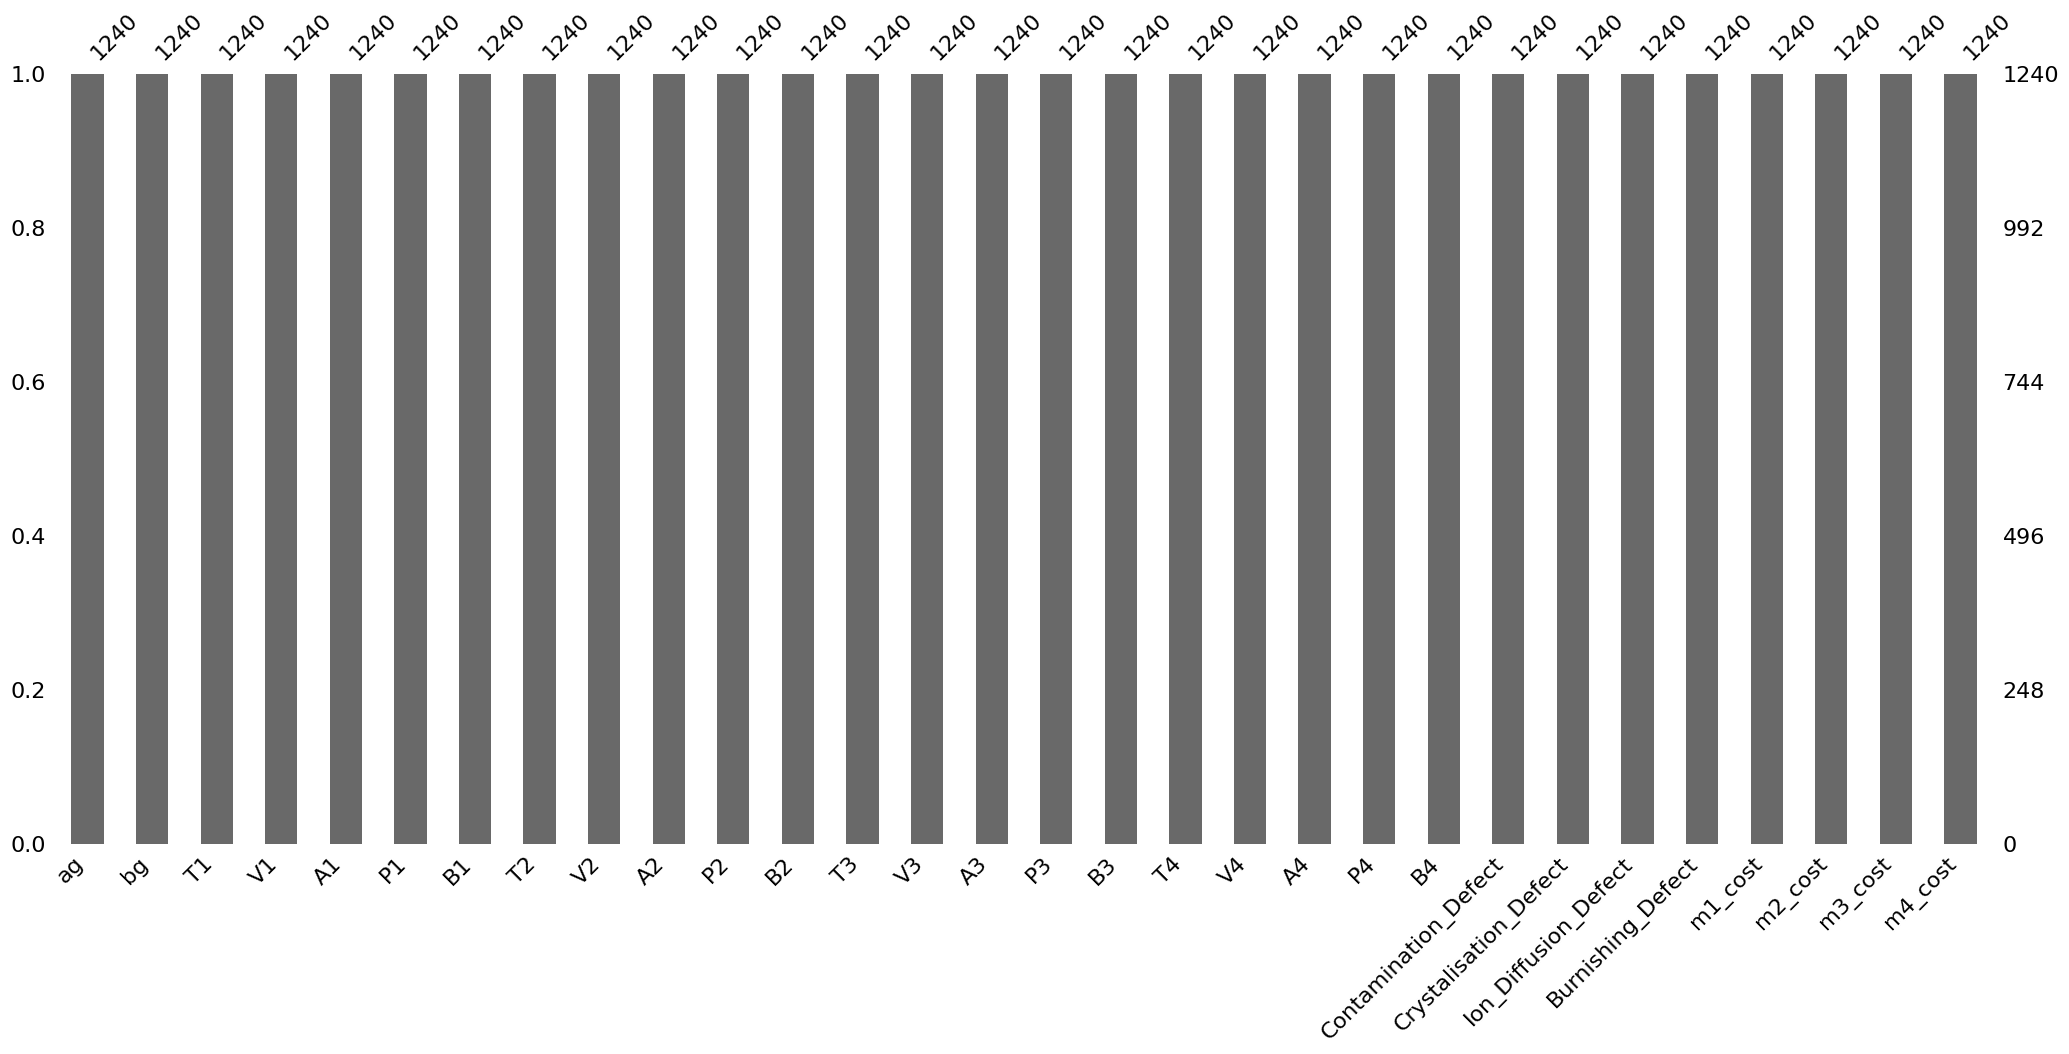

In [183]:
msno.bar(df_no_na)

array([[<Axes: xlabel='T1', ylabel='T1'>,
        <Axes: xlabel='V1', ylabel='T1'>,
        <Axes: xlabel='A1', ylabel='T1'>,
        <Axes: xlabel='P1', ylabel='T1'>,
        <Axes: xlabel='B1', ylabel='T1'>,
        <Axes: xlabel='T2', ylabel='T1'>,
        <Axes: xlabel='V2', ylabel='T1'>,
        <Axes: xlabel='A2', ylabel='T1'>,
        <Axes: xlabel='P2', ylabel='T1'>,
        <Axes: xlabel='B2', ylabel='T1'>,
        <Axes: xlabel='T3', ylabel='T1'>,
        <Axes: xlabel='V3', ylabel='T1'>,
        <Axes: xlabel='A3', ylabel='T1'>,
        <Axes: xlabel='P3', ylabel='T1'>,
        <Axes: xlabel='B3', ylabel='T1'>,
        <Axes: xlabel='T4', ylabel='T1'>,
        <Axes: xlabel='V4', ylabel='T1'>,
        <Axes: xlabel='A4', ylabel='T1'>,
        <Axes: xlabel='P4', ylabel='T1'>,
        <Axes: xlabel='B4', ylabel='T1'>,
        <Axes: xlabel='Contamination_Defect', ylabel='T1'>,
        <Axes: xlabel='Crystalisation_Defect', ylabel='T1'>,
        <Axes: xlabel='Ion_Diffusion_De

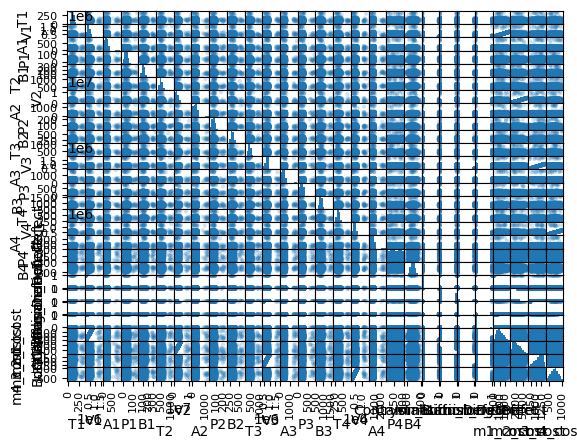

In [184]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [185]:
features = ["T1", "B1", "A1", "V1"]

array([[<Axes: xlabel='T1', ylabel='T1'>,
        <Axes: xlabel='B1', ylabel='T1'>,
        <Axes: xlabel='A1', ylabel='T1'>,
        <Axes: xlabel='V1', ylabel='T1'>],
       [<Axes: xlabel='T1', ylabel='B1'>,
        <Axes: xlabel='B1', ylabel='B1'>,
        <Axes: xlabel='A1', ylabel='B1'>,
        <Axes: xlabel='V1', ylabel='B1'>],
       [<Axes: xlabel='T1', ylabel='A1'>,
        <Axes: xlabel='B1', ylabel='A1'>,
        <Axes: xlabel='A1', ylabel='A1'>,
        <Axes: xlabel='V1', ylabel='A1'>],
       [<Axes: xlabel='T1', ylabel='V1'>,
        <Axes: xlabel='B1', ylabel='V1'>,
        <Axes: xlabel='A1', ylabel='V1'>,
        <Axes: xlabel='V1', ylabel='V1'>]], dtype=object)

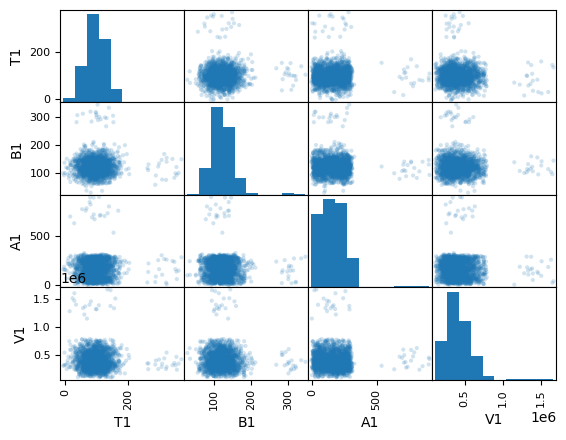

In [186]:
pd.plotting.scatter_matrix(df[features], alpha=0.2)

array([[<Axes: title={'center': 'T1'}>]], dtype=object)

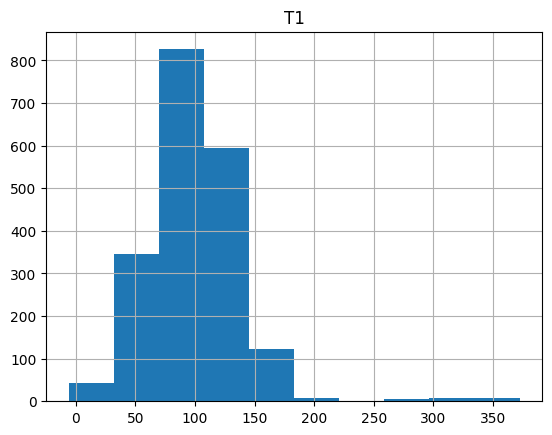

In [187]:
df.hist("T1")

array([[<Axes: title={'center': 'B1'}>]], dtype=object)

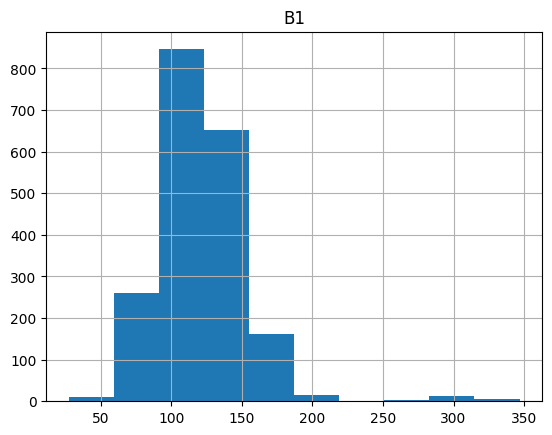

In [188]:
df.hist("B1")

array([[<Axes: title={'center': 'A1'}>]], dtype=object)

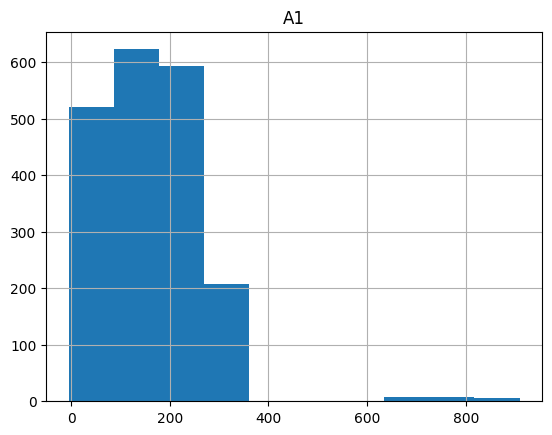

In [189]:
df.hist("A1")

array([[<Axes: title={'center': 'V1'}>]], dtype=object)

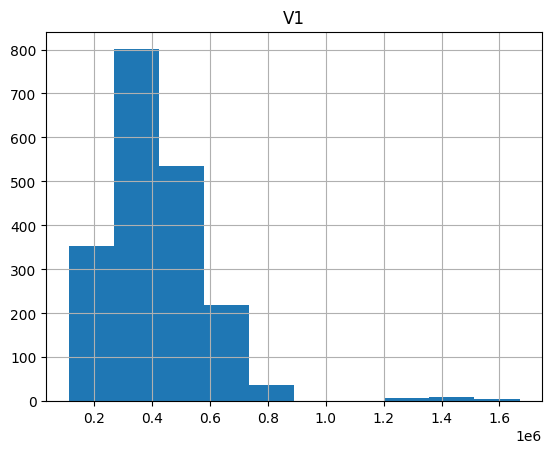

In [190]:
df.hist("V1")

In [191]:
def plotBox(df, features): # should be consistent underscore
    sns.boxplot(data=df[features])

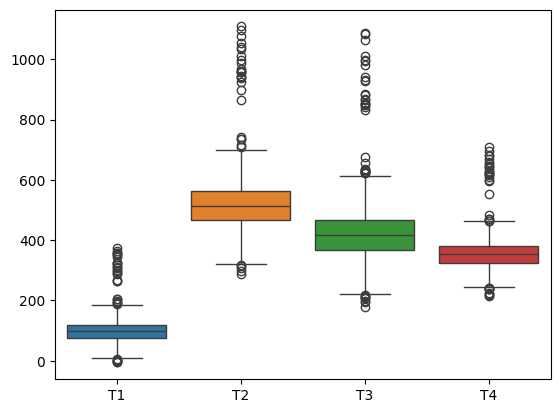

In [192]:
plotBox(df, ["T1", "T2", "T3", "T4"])

In [193]:
df.columns

Index(['ag', 'bg', 'T1', 'V1', 'A1', 'P1', 'B1', 'T2', 'V2', 'A2', 'P2', 'B2',
       'T3', 'V3', 'A3', 'P3', 'B3', 'T4', 'V4', 'A4', 'P4', 'B4',
       'Contamination_Defect', 'Crystalisation_Defect', 'Ion_Diffusion_Defect',
       'Burnishing_Defect', 'm1_cost', 'm2_cost', 'm3_cost', 'm4_cost'],
      dtype='object')

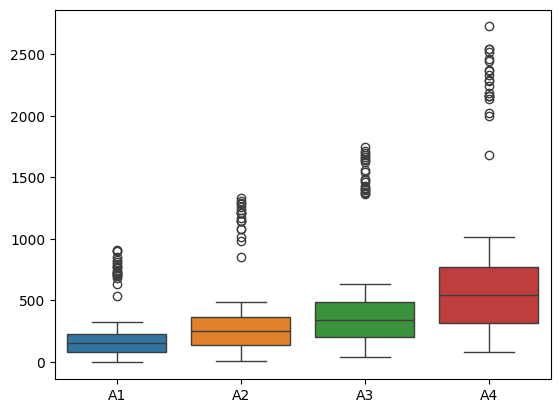

In [194]:
plotBox(df, ["A1", "A2", "A3", "A4"])

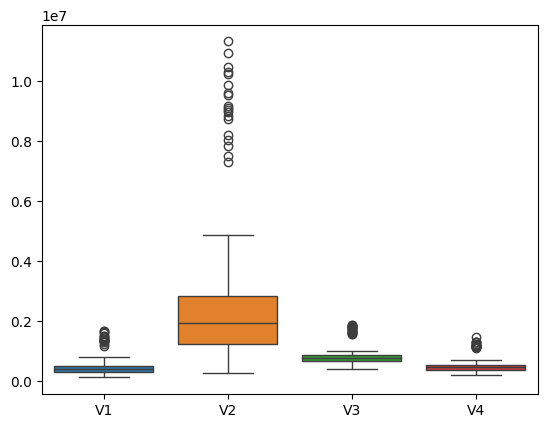

In [195]:
plotBox(df, ["V1", "V2", "V3", "V4"])

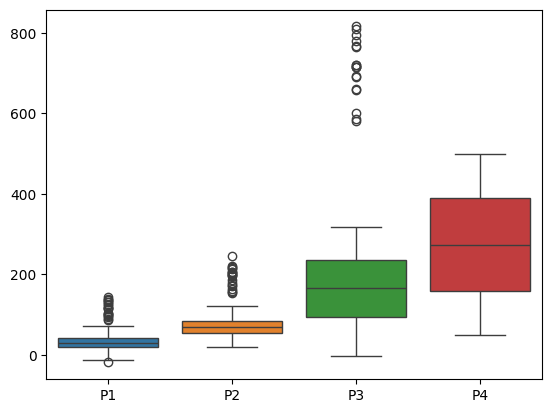

In [196]:
plotBox(df, ["P1", "P2", "P3", "P4"])

In [197]:
def plotViolin(df, features):
    sns.violinplot(data=df[features])

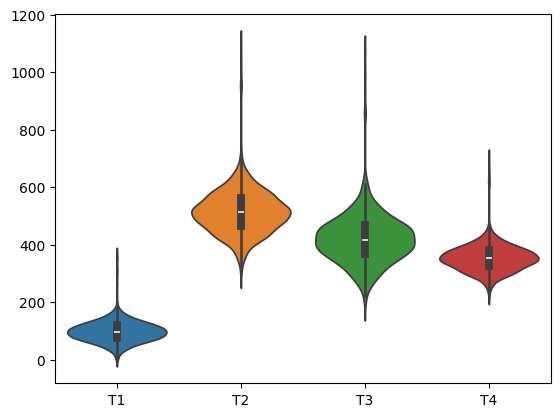

In [198]:
plotViolin(df, ["T1", "T2", "T3", "T4"])

In [199]:
def outliers_to_nan(df, features, n = 3): # typo n-3
    df_to_clean = df.copy()
    for feature in features:
        feature_z_score = ((df_to_clean[feature] - df_to_clean[feature].mean()) / df_to_clean[feature].std()).abs()
        df_to_clean.loc[feature_z_score > n, feature] = np.nan  # Correct the assignment here
    return df_to_clean

In [200]:
df.columns

Index(['ag', 'bg', 'T1', 'V1', 'A1', 'P1', 'B1', 'T2', 'V2', 'A2', 'P2', 'B2',
       'T3', 'V3', 'A3', 'P3', 'B3', 'T4', 'V4', 'A4', 'P4', 'B4',
       'Contamination_Defect', 'Crystalisation_Defect', 'Ion_Diffusion_Defect',
       'Burnishing_Defect', 'm1_cost', 'm2_cost', 'm3_cost', 'm4_cost'],
      dtype='object')

In [201]:
cleaned_df = outliers_to_nan(df, ['T1', 'V1', 'A1', 'P1', 'B1', 'T2', 'V2', 'A2', 'P2', 'B2','T3', 'V3', 'A3', 'P3', 'B3', 'T4', 'V4', 'A4', 'P4', 'B4','Contamination_Defect', 'Crystalisation_Defect', 'Ion_Diffusion_Defect', 'Burnishing_Defect'])
df_no_outliers = cleaned_df

In [202]:
cleaned_df

,ag,bg,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost
0,Low,Argon,93.99,445746.58,299.44,30.67,61.76,660.21,1.45e+06,468.43,83.22,244.53,370.20,786363.50,236.04,261.51,903.01,373.67,551459.56,388.98,192.87,349.56,0.0,0.0,0.0,0.0,1139.53,2064.62,1156.56,840.47
1,Low,Argon,57.16,389648.47,275.28,49.96,132.62,502.63,4.53e+06,435.62,79.78,211.53,398.50,574039.33,235.94,258.36,784.82,349.54,316078.98,816.77,387.36,340.56,0.0,1.0,0.0,0.0,1008.11,NaN,869.71,523.19
2,Medium,Argon,81.26,396609.84,235.95,15.26,130.84,501.80,2.89e+06,113.89,60.25,244.97,656.17,538461.10,100.47,144.16,821.06,344.41,384425.65,220.65,327.44,355.24,0.0,1.0,0.0,0.0,1024.36,4008.28,822.97,614.95
3,Medium,Neon,125.48,165185.46,221.71,14.67,116.94,437.94,2.67e+06,148.94,48.69,307.95,450.63,806097.99,551.39,127.93,786.11,362.83,461873.55,512.62,444.46,349.99,NaN,1.0,0.0,0.0,480.40,NaN,1184.28,719.92
4,Medium,Argon,138.01,626895.16,202.00,22.25,142.09,577.79,8.95e+05,242.34,62.91,326.96,448.58,867053.61,366.61,227.83,841.30,331.01,337105.69,644.09,363.18,332.95,0.0,0.0,0.0,0.0,1565.70,1309.50,1266.84,551.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Medium,Argon,75.38,293421.05,296.38,33.80,121.24,423.84,1.71e+06,214.81,69.53,305.61,388.57,395492.10,407.14,121.92,636.42,414.40,380119.01,935.51,267.83,344.83,0.0,0.0,NaN,0.0,782.01,2406.01,629.39,609.98
1996,Low,Argon,127.14,559967.44,96.77,-0.97,132.54,668.87,3.26e+06,118.29,72.06,411.19,515.90,551105.83,441.14,275.36,792.74,333.25,320311.83,492.46,295.56,342.24,0.0,1.0,0.0,0.0,1408.13,4500.85,841.29,528.37
1997,High,Argon,110.84,590151.68,255.16,NaN,133.59,466.33,1.43e+06,88.66,42.39,349.45,444.84,604407.70,372.51,214.41,811.88,391.98,279351.77,85.78,157.45,365.05,0.0,0.0,0.0,0.0,1479.36,2036.43,912.39,473.06
1998,High,C02,48.61,410247.00,230.21,17.47,115.00,536.73,3.04e+06,201.59,92.30,311.82,500.04,823811.39,484.88,209.98,706.68,383.47,537736.43,412.18,75.85,312.21,0.0,1.0,0.0,0.0,1056.18,4202.86,1208.68,821.62


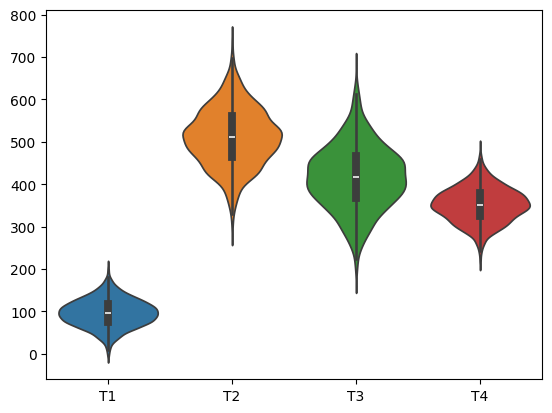

In [203]:
plotViolin(cleaned_df, ["T1", "T2", "T3", "T4"])

In [204]:
cleaned_df.info() # here should be cleaned_df info not df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ag                     1978 non-null   object 
 1   bg                     1980 non-null   object 
 2   T1                     1940 non-null   float64
 3   V1                     1945 non-null   float64
 4   A1                     1944 non-null   float64
 5   P1                     1947 non-null   float64
 6   B1                     1949 non-null   float64
 7   T2                     1943 non-null   float64
 8   V2                     1946 non-null   float64
 9   A2                     1932 non-null   float64
 10  P2                     1935 non-null   float64
 11  B2                     1949 non-null   float64
 12  T3                     1940 non-null   float64
 13  V3                     1947 non-null   float64
 14  A3                     1937 non-null   float64
 15  P3  

In [205]:
def impute_nan_values(df, feature_name, imputation_type="mean"):
    df_imputed = df.copy()
    if imputation_type == "mean":
        imputation_value = df_imputed[feature_name].mean()
    elif imputation_type == "median":
        imputation_value = df_imputed[feature_name].median()
    else:
        raise ValueError("Imputation type not supported")
    
    df_imputed[feature_name] = df_imputed[feature_name].fillna(imputation_value)

    return df_imputed


In [206]:
df_imputed = impute_nan_values(cleaned_df, "T1", "mean")
df_imputed = impute_nan_values(df_imputed, "T2", "mean")
df_imputed = impute_nan_values(df_imputed, "T3", "mean")
df_imputed = impute_nan_values(df_imputed, "T4", "mean")

In [207]:
df_imputed

,ag,bg,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost
0,Low,Argon,93.99,445746.58,299.44,30.67,61.76,660.21,1.45e+06,468.43,83.22,244.53,370.20,786363.50,236.04,261.51,903.01,373.67,551459.56,388.98,192.87,349.56,0.0,0.0,0.0,0.0,1139.53,2064.62,1156.56,840.47
1,Low,Argon,57.16,389648.47,275.28,49.96,132.62,502.63,4.53e+06,435.62,79.78,211.53,398.50,574039.33,235.94,258.36,784.82,349.54,316078.98,816.77,387.36,340.56,0.0,1.0,0.0,0.0,1008.11,NaN,869.71,523.19
2,Medium,Argon,81.26,396609.84,235.95,15.26,130.84,501.80,2.89e+06,113.89,60.25,244.97,656.17,538461.10,100.47,144.16,821.06,344.41,384425.65,220.65,327.44,355.24,0.0,1.0,0.0,0.0,1024.36,4008.28,822.97,614.95
3,Medium,Neon,125.48,165185.46,221.71,14.67,116.94,437.94,2.67e+06,148.94,48.69,307.95,450.63,806097.99,551.39,127.93,786.11,362.83,461873.55,512.62,444.46,349.99,NaN,1.0,0.0,0.0,480.40,NaN,1184.28,719.92
4,Medium,Argon,138.01,626895.16,202.00,22.25,142.09,577.79,8.95e+05,242.34,62.91,326.96,448.58,867053.61,366.61,227.83,841.30,331.01,337105.69,644.09,363.18,332.95,0.0,0.0,0.0,0.0,1565.70,1309.50,1266.84,551.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Medium,Argon,75.38,293421.05,296.38,33.80,121.24,423.84,1.71e+06,214.81,69.53,305.61,388.57,395492.10,407.14,121.92,636.42,414.40,380119.01,935.51,267.83,344.83,0.0,0.0,NaN,0.0,782.01,2406.01,629.39,609.98
1996,Low,Argon,127.14,559967.44,96.77,-0.97,132.54,668.87,3.26e+06,118.29,72.06,411.19,515.90,551105.83,441.14,275.36,792.74,333.25,320311.83,492.46,295.56,342.24,0.0,1.0,0.0,0.0,1408.13,4500.85,841.29,528.37
1997,High,Argon,110.84,590151.68,255.16,NaN,133.59,466.33,1.43e+06,88.66,42.39,349.45,444.84,604407.70,372.51,214.41,811.88,391.98,279351.77,85.78,157.45,365.05,0.0,0.0,0.0,0.0,1479.36,2036.43,912.39,473.06
1998,High,C02,48.61,410247.00,230.21,17.47,115.00,536.73,3.04e+06,201.59,92.30,311.82,500.04,823811.39,484.88,209.98,706.68,383.47,537736.43,412.18,75.85,312.21,0.0,1.0,0.0,0.0,1056.18,4202.86,1208.68,821.62


<Axes: >

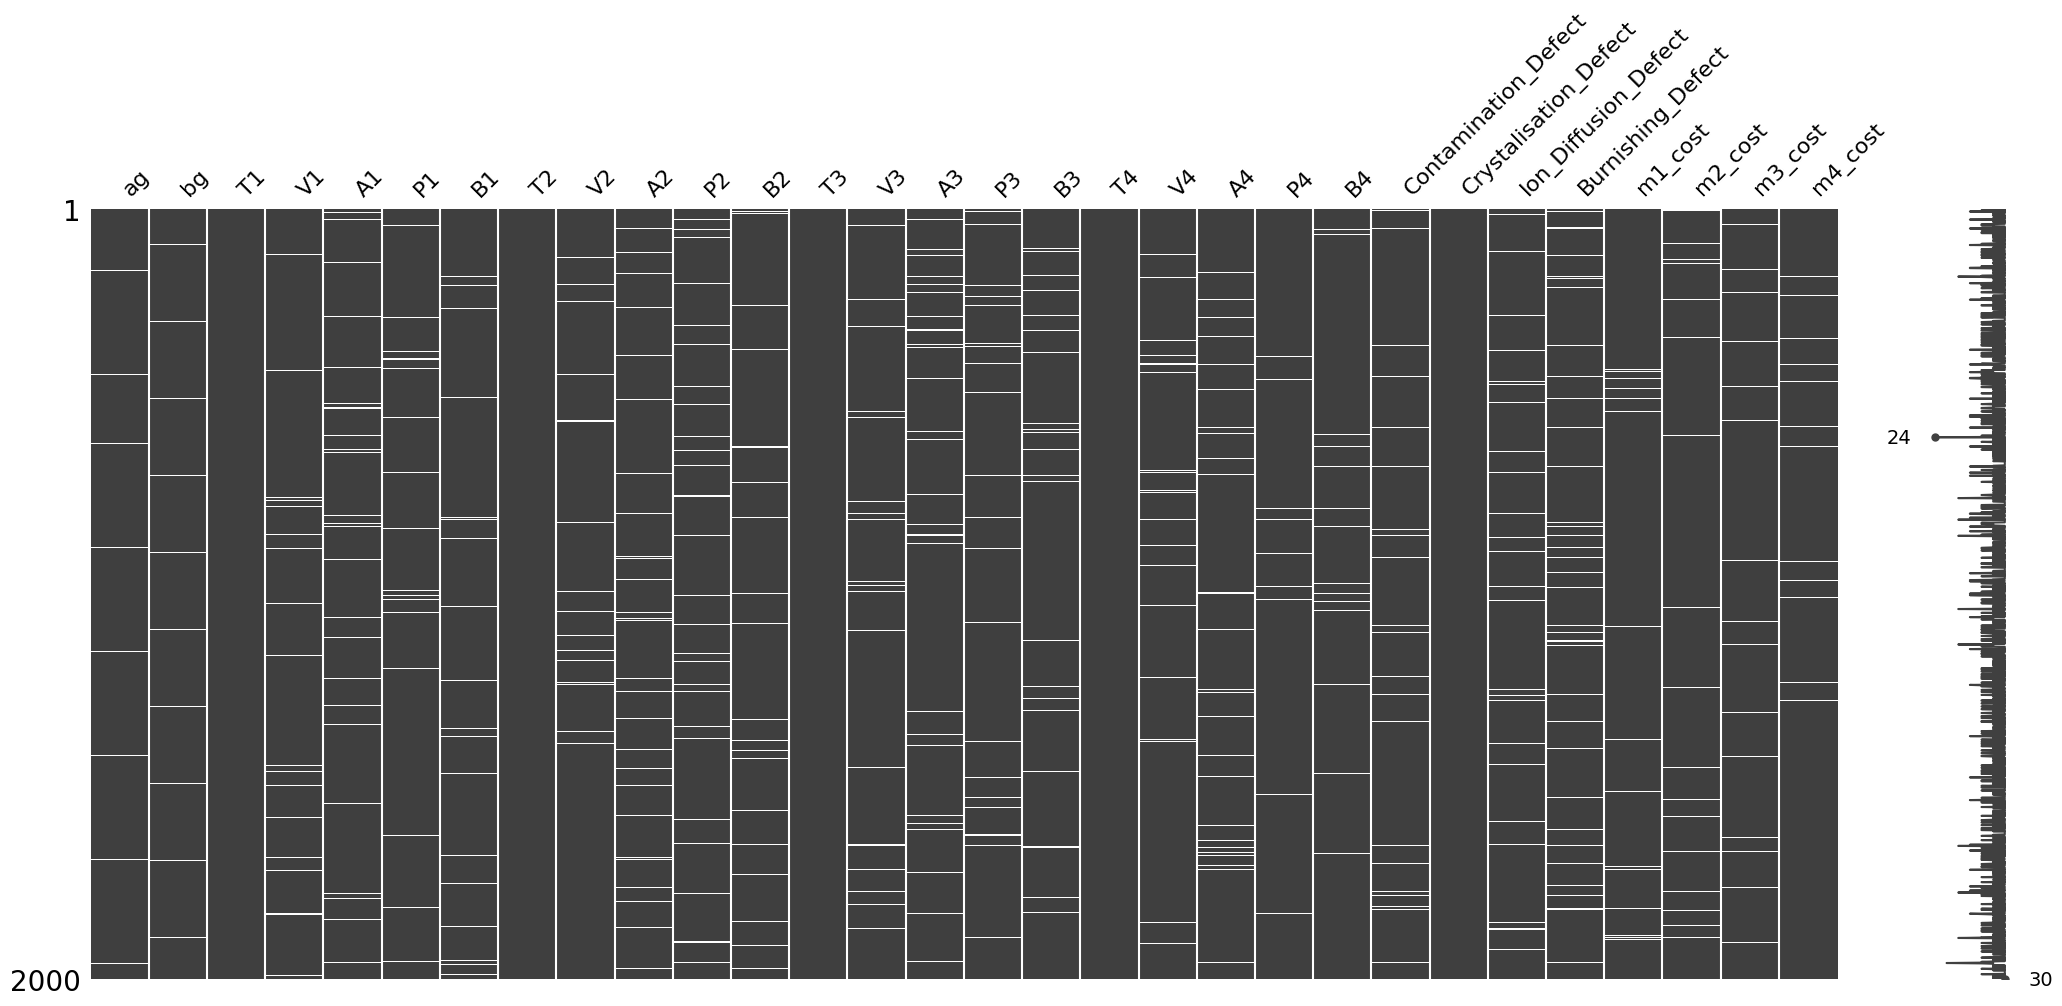

In [208]:
msno.matrix(df_imputed)

In [209]:
df_imputed = impute_nan_values(df_imputed, "m1_cost", "mean")
df_imputed = impute_nan_values(df_imputed, "m2_cost", "mean")
df_imputed = impute_nan_values(df_imputed, "m3_cost", "mean")
df_imputed = impute_nan_values(df_imputed, "m4_cost", "mean")

In [210]:
for feature in  ['T1', 'V1', 'A1', 'P1', 'B1', 'T2', 'V2', 'A2', 'P2', 'B2','T3', 'V3', 'A3', 'P3', 'B3', 'T4', 'V4', 'A4', 'P4', 'B4','Contamination_Defect', 'Crystalisation_Defect', 'Ion_Diffusion_Defect', 'Burnishing_Defect']:
    df_imputed = impute_nan_values(df_imputed, feature, "mean")

<Axes: >

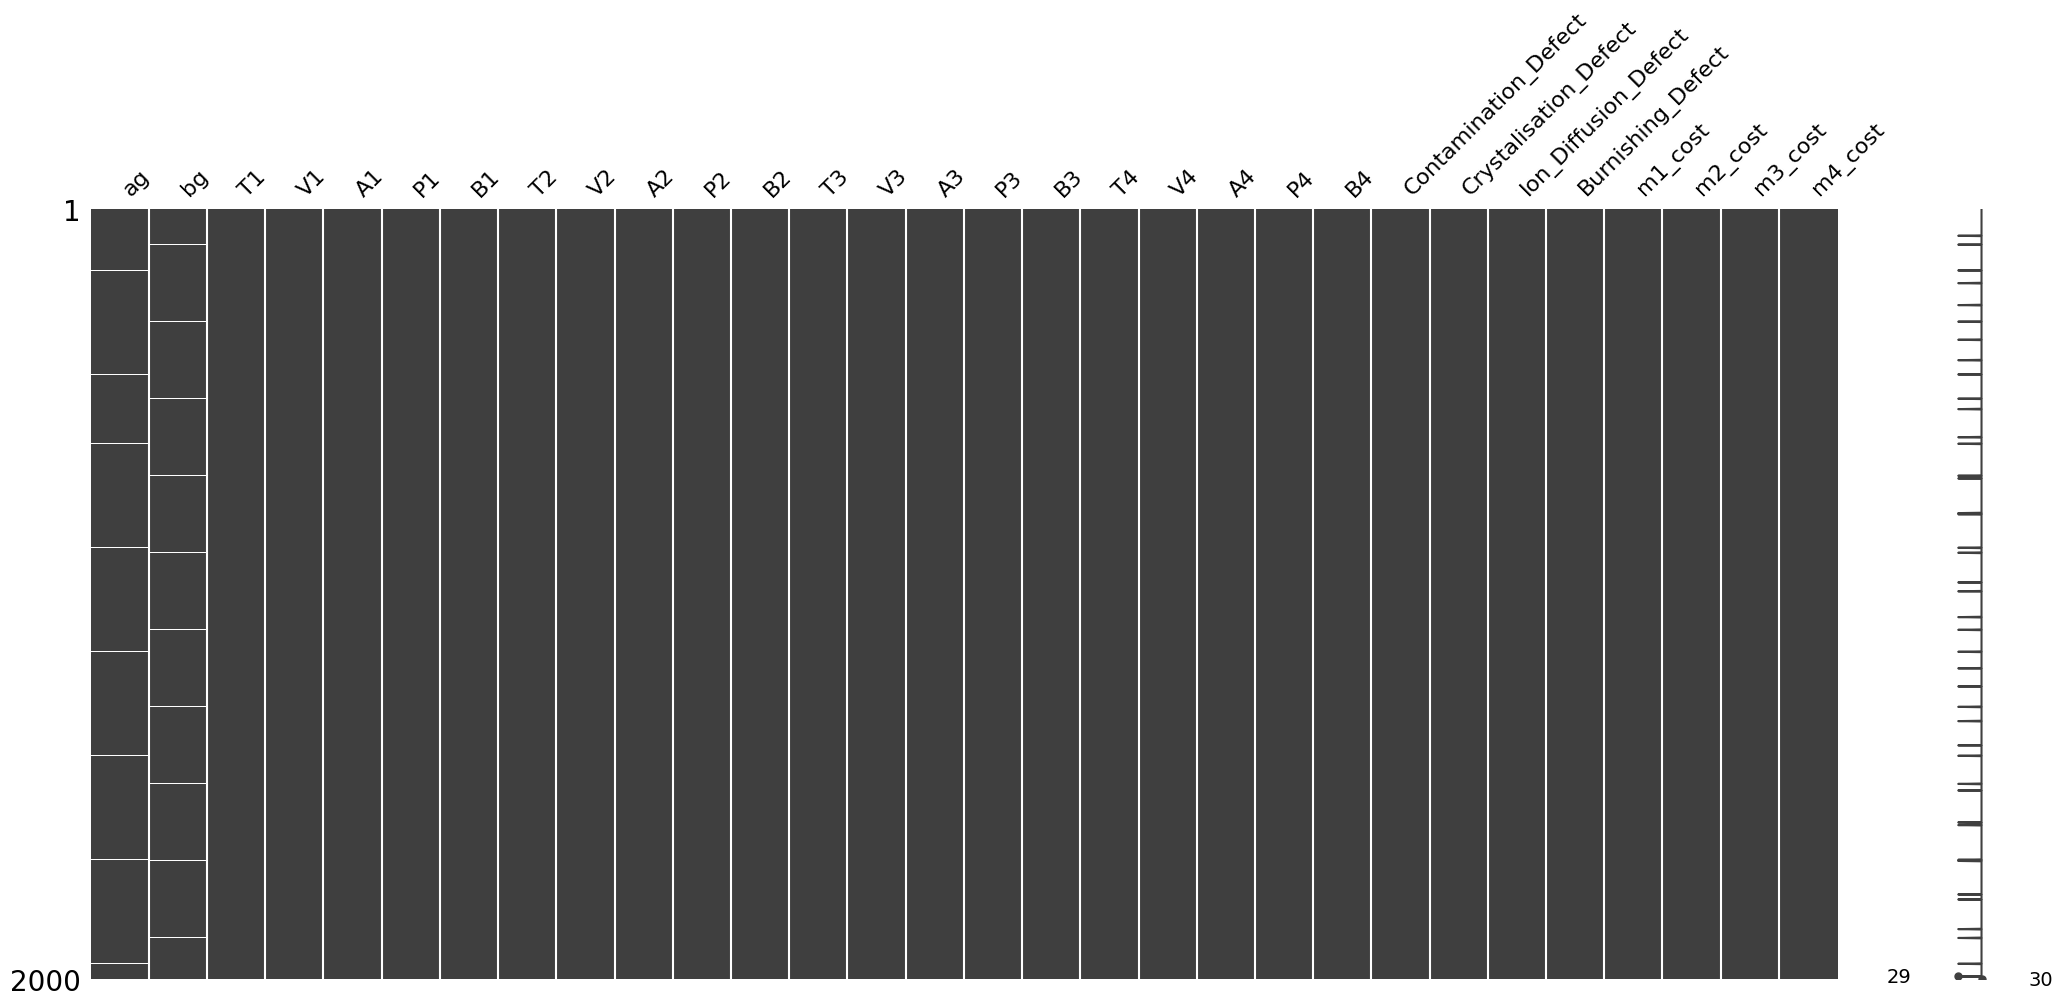

In [211]:
msno.matrix(df_imputed)

In [212]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [213]:
df_no_outliers

,ag,bg,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost
0,Low,Argon,93.99,445746.58,299.44,30.67,61.76,660.21,1.45e+06,468.43,83.22,244.53,370.20,786363.50,236.04,261.51,903.01,373.67,551459.56,388.98,192.87,349.56,0.0,0.0,0.0,0.0,1139.53,2064.62,1156.56,840.47
1,Low,Argon,57.16,389648.47,275.28,49.96,132.62,502.63,4.53e+06,435.62,79.78,211.53,398.50,574039.33,235.94,258.36,784.82,349.54,316078.98,816.77,387.36,340.56,0.0,1.0,0.0,0.0,1008.11,NaN,869.71,523.19
2,Medium,Argon,81.26,396609.84,235.95,15.26,130.84,501.80,2.89e+06,113.89,60.25,244.97,656.17,538461.10,100.47,144.16,821.06,344.41,384425.65,220.65,327.44,355.24,0.0,1.0,0.0,0.0,1024.36,4008.28,822.97,614.95
3,Medium,Neon,125.48,165185.46,221.71,14.67,116.94,437.94,2.67e+06,148.94,48.69,307.95,450.63,806097.99,551.39,127.93,786.11,362.83,461873.55,512.62,444.46,349.99,NaN,1.0,0.0,0.0,480.40,NaN,1184.28,719.92
4,Medium,Argon,138.01,626895.16,202.00,22.25,142.09,577.79,8.95e+05,242.34,62.91,326.96,448.58,867053.61,366.61,227.83,841.30,331.01,337105.69,644.09,363.18,332.95,0.0,0.0,0.0,0.0,1565.70,1309.50,1266.84,551.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Medium,Argon,75.38,293421.05,296.38,33.80,121.24,423.84,1.71e+06,214.81,69.53,305.61,388.57,395492.10,407.14,121.92,636.42,414.40,380119.01,935.51,267.83,344.83,0.0,0.0,NaN,0.0,782.01,2406.01,629.39,609.98
1996,Low,Argon,127.14,559967.44,96.77,-0.97,132.54,668.87,3.26e+06,118.29,72.06,411.19,515.90,551105.83,441.14,275.36,792.74,333.25,320311.83,492.46,295.56,342.24,0.0,1.0,0.0,0.0,1408.13,4500.85,841.29,528.37
1997,High,Argon,110.84,590151.68,255.16,NaN,133.59,466.33,1.43e+06,88.66,42.39,349.45,444.84,604407.70,372.51,214.41,811.88,391.98,279351.77,85.78,157.45,365.05,0.0,0.0,0.0,0.0,1479.36,2036.43,912.39,473.06
1998,High,C02,48.61,410247.00,230.21,17.47,115.00,536.73,3.04e+06,201.59,92.30,311.82,500.04,823811.39,484.88,209.98,706.68,383.47,537736.43,412.18,75.85,312.21,0.0,1.0,0.0,0.0,1056.18,4202.86,1208.68,821.62


In [215]:
df_no_outliers.columns

Index(['ag', 'bg', 'T1', 'V1', 'A1', 'P1', 'B1', 'T2', 'V2', 'A2', 'P2', 'B2',
       'T3', 'V3', 'A3', 'P3', 'B3', 'T4', 'V4', 'A4', 'P4', 'B4',
       'Contamination_Defect', 'Crystalisation_Defect', 'Ion_Diffusion_Defect',
       'Burnishing_Defect', 'm1_cost', 'm2_cost', 'm3_cost', 'm4_cost'],
      dtype='object')

In [220]:
imputed = imp.fit_transform(df_no_outliers.select_dtypes(exclude=["object"]))

In [225]:
imputed_df = pd.DataFrame(imputed, columns = df_no_outliers.select_dtypes(exclude=["object"]).columns)

In [226]:
imputed_df["ag"] = df_no_outliers["ag"]
imputed_df["bg"] = df_no_outliers["bg"]

In [227]:
imputed_df

,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost,ag,bg
0,93.99,445746.58,299.44,30.67,61.76,660.21,1.45e+06,468.43,83.22,244.53,370.20,786363.50,236.04,261.51,903.01,373.67,551459.56,388.98,192.87,349.56,0.0,0.0,0.0,0.0,1139.53,2064.62,1156.56,840.47,Low,Argon
1,57.16,389648.47,275.28,49.96,132.62,502.63,4.53e+06,435.62,79.78,211.53,398.50,574039.33,235.94,258.36,784.82,349.54,316078.98,816.77,387.36,340.56,0.0,1.0,0.0,0.0,1008.11,6221.04,869.71,523.19,Low,Argon
2,81.26,396609.84,235.95,15.26,130.84,501.80,2.89e+06,113.89,60.25,244.97,656.17,538461.10,100.47,144.16,821.06,344.41,384425.65,220.65,327.44,355.24,0.0,1.0,0.0,0.0,1024.36,4008.28,822.97,614.95,Medium,Argon
3,125.48,165185.46,221.71,14.67,116.94,437.94,2.67e+06,148.94,48.69,307.95,450.63,806097.99,551.39,127.93,786.11,362.83,461873.55,512.62,444.46,349.99,0.0,1.0,0.0,0.0,480.40,3698.99,1184.28,719.92,Medium,Neon
4,138.01,626895.16,202.00,22.25,142.09,577.79,8.95e+05,242.34,62.91,326.96,448.58,867053.61,366.61,227.83,841.30,331.01,337105.69,644.09,363.18,332.95,0.0,0.0,0.0,0.0,1565.70,1309.50,1266.84,551.15,Medium,Argon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,75.38,293421.05,296.38,33.80,121.24,423.84,1.71e+06,214.81,69.53,305.61,388.57,395492.10,407.14,121.92,636.42,414.40,380119.01,935.51,267.83,344.83,0.0,0.0,0.0,0.0,782.01,2406.01,629.39,609.98,Medium,Argon
1996,127.14,559967.44,96.77,-0.97,132.54,668.87,3.26e+06,118.29,72.06,411.19,515.90,551105.83,441.14,275.36,792.74,333.25,320311.83,492.46,295.56,342.24,0.0,1.0,0.0,0.0,1408.13,4500.85,841.29,528.37,Low,Argon
1997,110.84,590151.68,255.16,28.87,133.59,466.33,1.43e+06,88.66,42.39,349.45,444.84,604407.70,372.51,214.41,811.88,391.98,279351.77,85.78,157.45,365.05,0.0,0.0,0.0,0.0,1479.36,2036.43,912.39,473.06,High,Argon
1998,48.61,410247.00,230.21,17.47,115.00,536.73,3.04e+06,201.59,92.30,311.82,500.04,823811.39,484.88,209.98,706.68,383.47,537736.43,412.18,75.85,312.21,0.0,1.0,0.0,0.0,1056.18,4202.86,1208.68,821.62,High,C02


<Axes: >

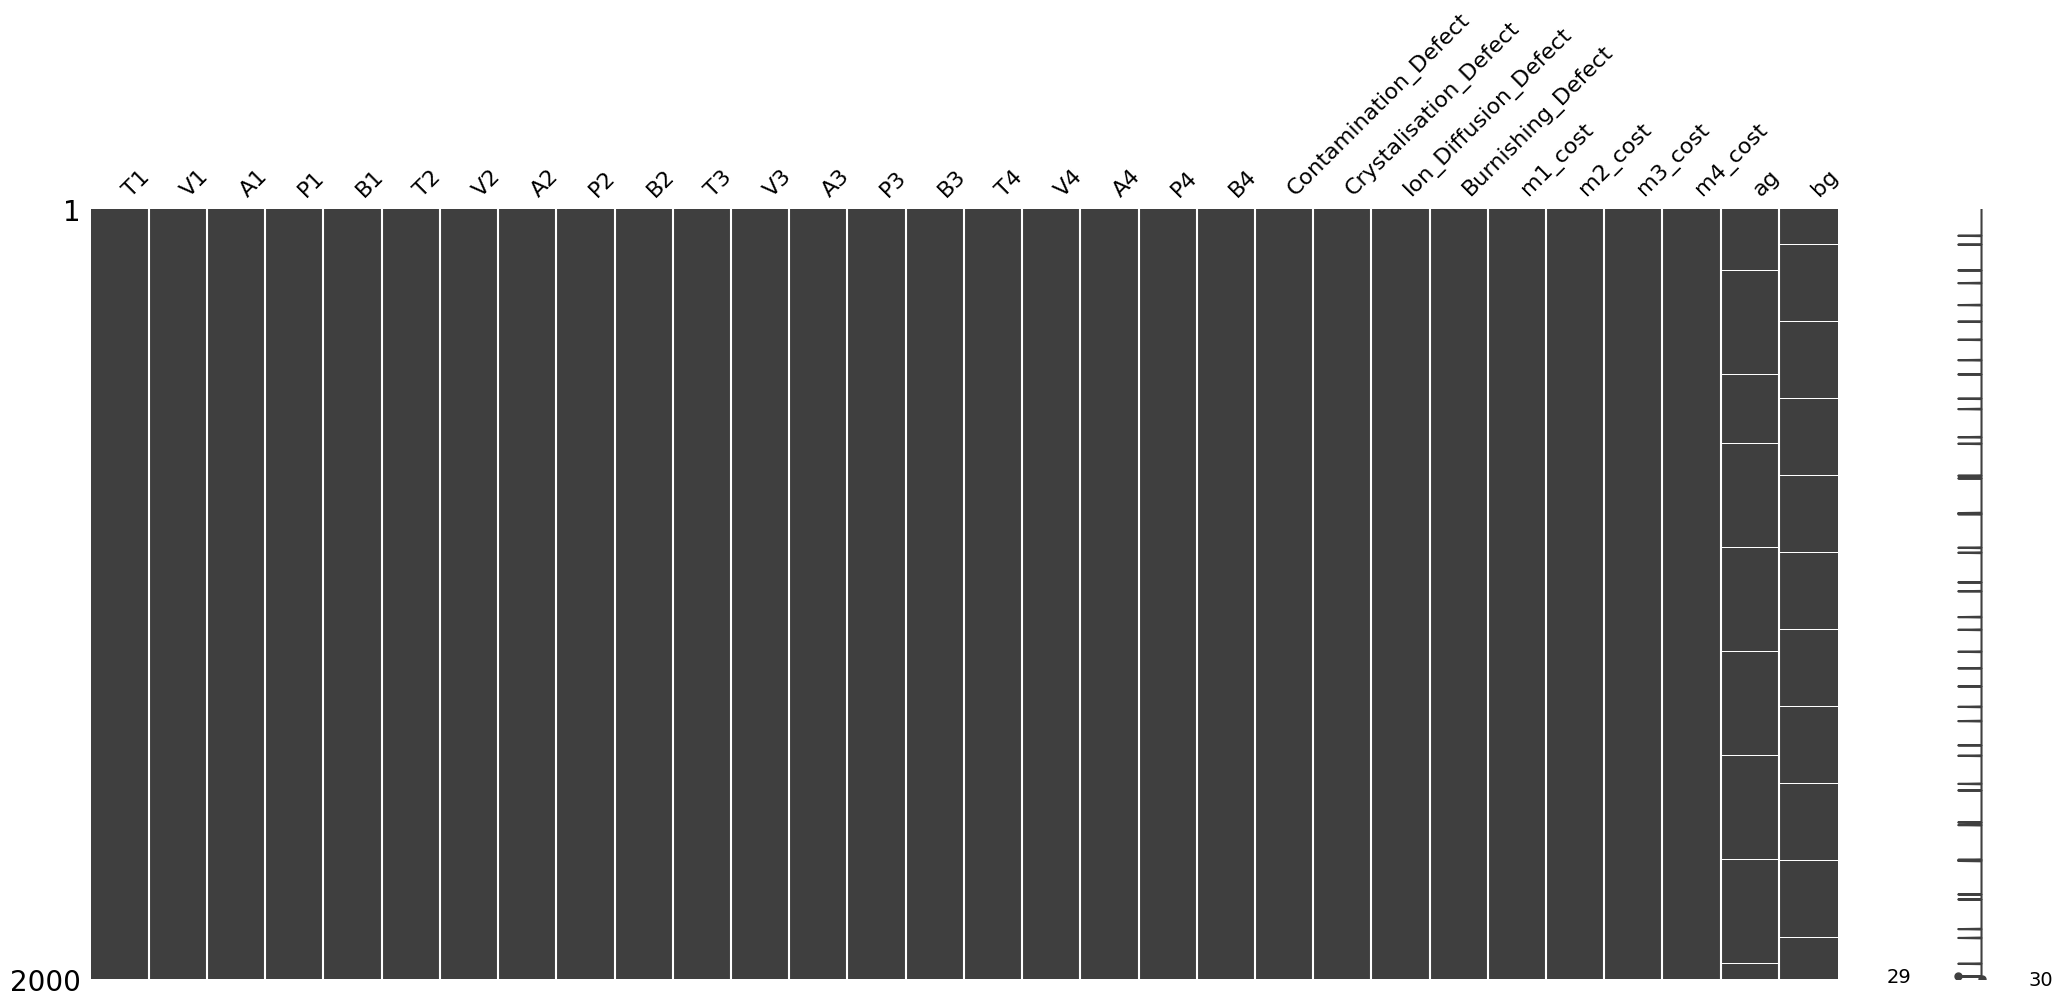

In [229]:
msno.matrix(imputed_df)

<Axes: >

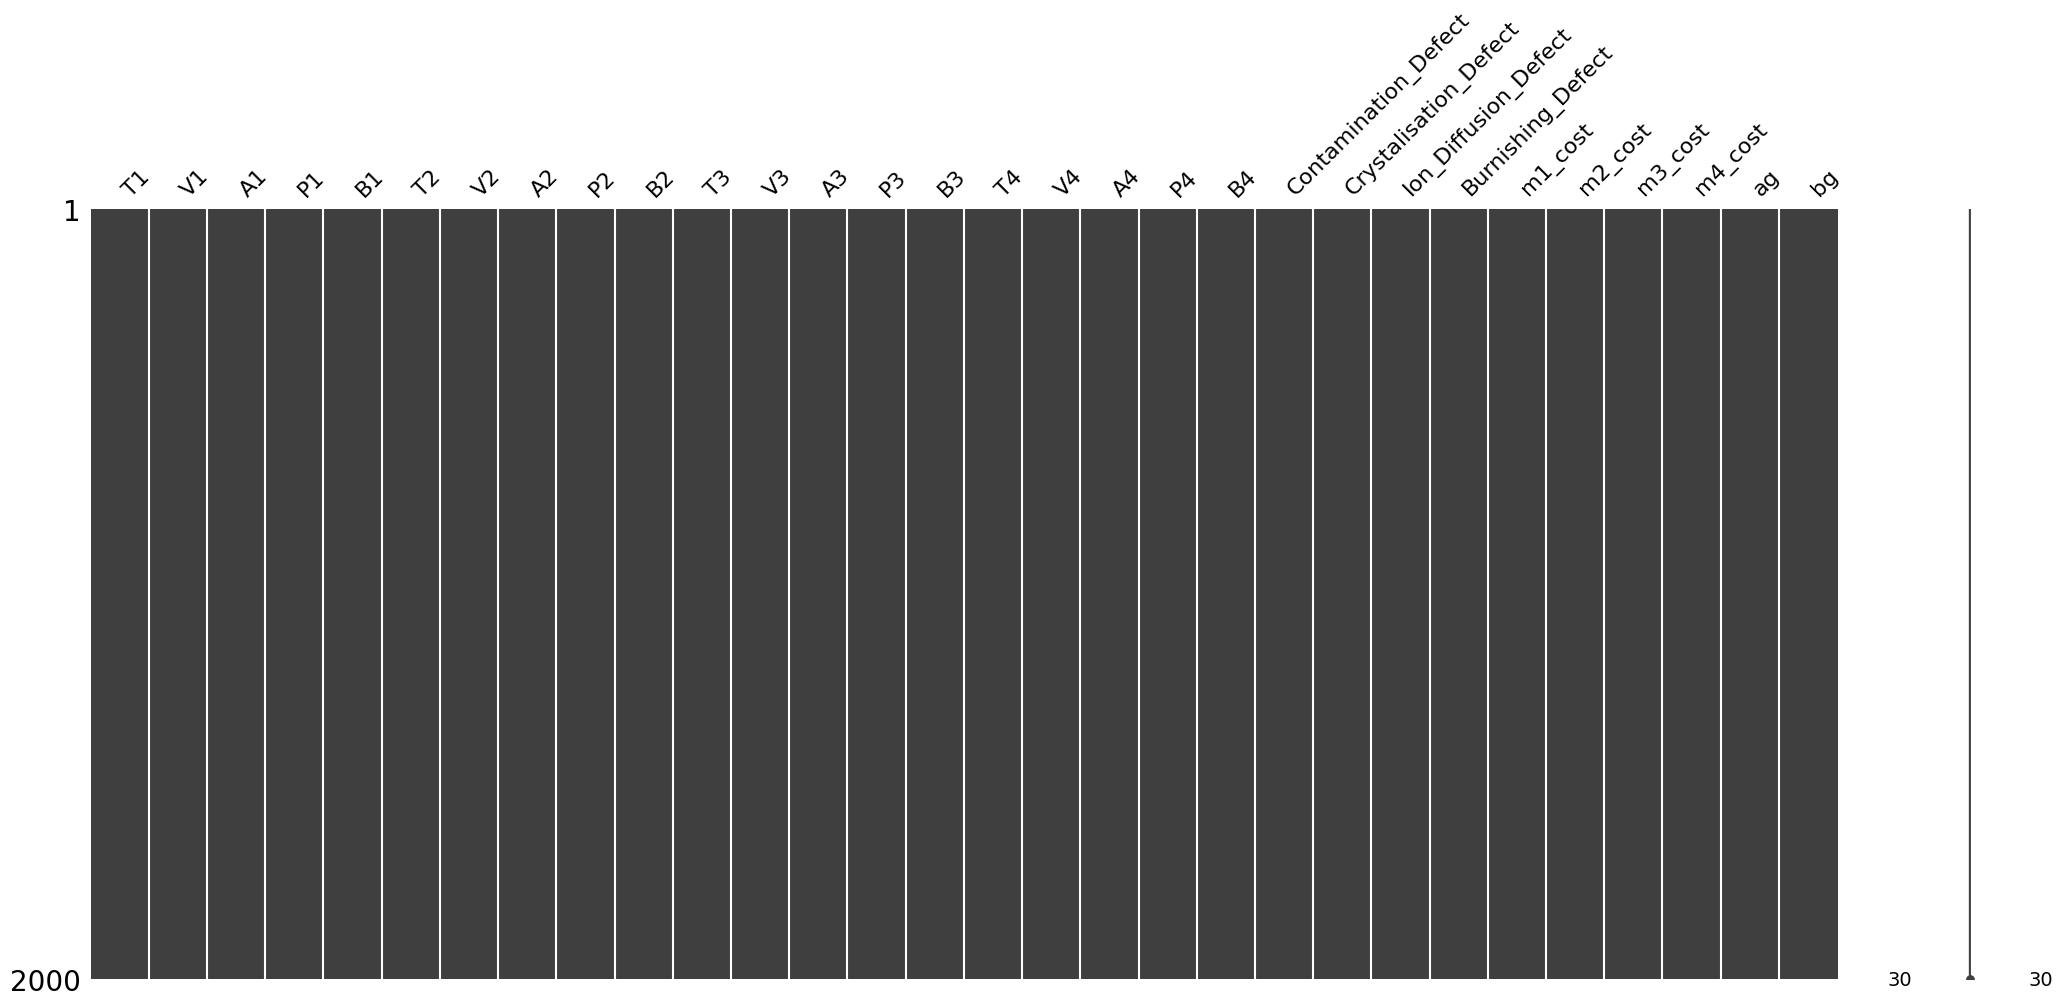

In [239]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df_no_outliers[["ag", "bg"]])
imputed_df[["ag", "bg"]] = imputer.transform(df_no_outliers[["ag", "bg"]])
msno.matrix(imputed_df)

In [243]:
features_to_be_standardized = ['T1', 'V1', 'A1', 'P1', 'B1', 'T2', 'V2', 'A2', 'P2', 'B2', 'T3', 'V3', 'A3', 'P3', 'B3', 'T4', 'V4', 'A4', 'P4', 'B4']

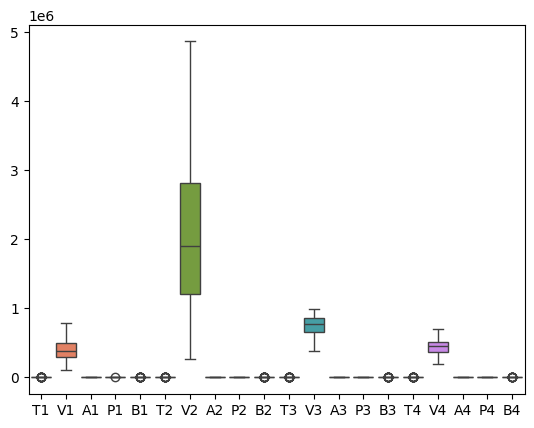

In [244]:
plotBox(imputed_df, features_to_be_standardized)

In [258]:
def feature_standardize(df, features_to_be_standardized):
    df_standardized = df.copy()
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(df[features_to_be_standardized]), columns=features_to_be_standardized)
    df_standardized[features_to_be_standardized] = scaled_df
    return df_standardized, scaler.scale_, scaler.mean_

In [259]:
standardized_df, scale, mean = feature_standardize(imputed_df, features_to_be_standardized)

In [260]:
scale

array([3.24394537e+01, 1.43685638e+05, 8.29906815e+01, 1.51985004e+01,
       2.67746664e+01, 6.83996162e+01, 1.03774934e+06, 1.28801810e+02,
       1.94681672e+01, 4.19090761e+01, 7.55480719e+01, 1.40022633e+05,
       1.61671155e+02, 8.02842808e+01, 8.87800356e+01, 4.07077715e+01,
       1.05014453e+05, 2.61014756e+02, 1.30075157e+02, 1.57362044e+01])

In [261]:
mean

array([9.70320005e+01, 4.04359438e+05, 1.54484183e+02, 3.00636169e+01,
       1.19812365e+02, 5.11911012e+02, 2.06813520e+06, 2.49944845e+02,
       6.90312175e+01, 3.01310490e+02, 4.16372906e+02, 7.53371987e+05,
       3.39766537e+02, 1.61609082e+02, 8.16475296e+02, 3.51831502e+02,
       4.46270955e+05, 5.40301051e+02, 2.72992136e+02, 3.39382815e+02])

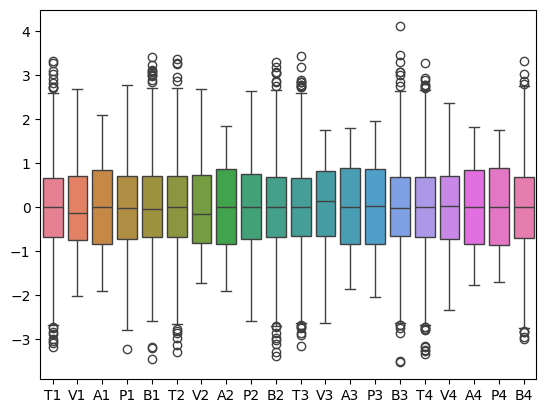

In [257]:
plotBox(standardized_df, features_to_be_standardized)

In [267]:
ag_mapping = {"Low": 1, "Medium": 2, "High": 3}

In [268]:
standardized_df

,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost,ag,bg
0,-0.09,0.29,1.75,0.04,-2.17,2.17,-0.59,1.70,0.73,-1.35,-0.61,0.24,-0.64,1.24,0.97,0.54,1.00,-0.58,-0.62,0.65,0.0,0.0,0.0,0.0,1139.53,2064.62,1156.56,840.47,Low,Argon
1,-1.23,-0.10,1.46,1.31,0.48,-0.14,2.38,1.44,0.55,-2.14,-0.24,-1.28,-0.64,1.21,-0.36,-0.06,-1.24,1.06,0.88,0.08,0.0,1.0,0.0,0.0,1008.11,6221.04,869.71,523.19,Low,Argon
2,-0.49,-0.05,0.98,-0.97,0.41,-0.15,0.80,-1.06,-0.45,-1.34,3.17,-1.53,-1.48,-0.22,0.05,-0.18,-0.59,-1.22,0.42,1.01,0.0,1.0,0.0,0.0,1024.36,4008.28,822.97,614.95,Medium,Argon
3,0.88,-1.66,0.81,-1.01,-0.11,-1.08,0.58,-0.78,-1.04,0.16,0.45,0.38,1.31,-0.42,-0.34,0.27,0.15,-0.11,1.32,0.67,0.0,1.0,0.0,0.0,480.40,3698.99,1184.28,719.92,Medium,Neon
4,1.26,1.55,0.57,-0.51,0.83,0.96,-1.13,-0.06,-0.31,0.61,0.43,0.81,0.17,0.82,0.28,-0.51,-1.04,0.40,0.69,-0.41,0.0,0.0,0.0,0.0,1565.70,1309.50,1266.84,551.15,Medium,Argon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.67,-0.77,1.71,0.25,0.05,-1.29,-0.35,-0.27,0.03,0.10,-0.37,-2.56,0.42,-0.49,-2.03,1.54,-0.63,1.51,-0.04,0.35,0.0,0.0,0.0,0.0,782.01,2406.01,629.39,609.98,Medium,Argon
1996,0.93,1.08,-0.70,-2.04,0.48,2.29,1.15,-1.02,0.16,2.62,1.32,-1.44,0.63,1.42,-0.27,-0.46,-1.20,-0.18,0.17,0.18,0.0,1.0,0.0,0.0,1408.13,4500.85,841.29,528.37,Low,Argon
1997,0.43,1.29,1.21,-0.08,0.51,-0.67,-0.61,-1.25,-1.37,1.15,0.38,-1.06,0.20,0.66,-0.05,0.99,-1.59,-1.74,-0.89,1.63,0.0,0.0,0.0,0.0,1479.36,2036.43,912.39,473.06,High,Argon
1998,-1.49,0.04,0.91,-0.83,-0.18,0.36,0.94,-0.38,1.20,0.25,1.11,0.50,0.90,0.60,-1.24,0.78,0.87,-0.49,-1.52,-1.73,0.0,1.0,0.0,0.0,1056.18,4202.86,1208.68,821.62,High,C02


In [269]:
def transform_ordinal_to_numeric(df, feature, mapping):
    df_transformed = df.copy()
    df_transformed[feature] = df_transformed[feature].map(mapping)
    return df_transformed

In [273]:
transformed_df = transform_ordinal_to_numeric(standardized_df, "ag", ag_mapping)

In [274]:
pd.get_dummies(transformed_df, columns=["bg"])

,T1,V1,A1,P1,B1,T2,V2,A2,P2,B2,T3,V3,A3,P3,B3,T4,V4,A4,P4,B4,Contamination_Defect,Crystalisation_Defect,Ion_Diffusion_Defect,Burnishing_Defect,m1_cost,m2_cost,m3_cost,m4_cost,ag,bg_Argon,bg_C02,bg_Neon
0,-0.09,0.29,1.75,0.04,-2.17,2.17,-0.59,1.70,0.73,-1.35,-0.61,0.24,-0.64,1.24,0.97,0.54,1.00,-0.58,-0.62,0.65,0.0,0.0,0.0,0.0,1139.53,2064.62,1156.56,840.47,1,True,False,False
1,-1.23,-0.10,1.46,1.31,0.48,-0.14,2.38,1.44,0.55,-2.14,-0.24,-1.28,-0.64,1.21,-0.36,-0.06,-1.24,1.06,0.88,0.08,0.0,1.0,0.0,0.0,1008.11,6221.04,869.71,523.19,1,True,False,False
2,-0.49,-0.05,0.98,-0.97,0.41,-0.15,0.80,-1.06,-0.45,-1.34,3.17,-1.53,-1.48,-0.22,0.05,-0.18,-0.59,-1.22,0.42,1.01,0.0,1.0,0.0,0.0,1024.36,4008.28,822.97,614.95,2,True,False,False
3,0.88,-1.66,0.81,-1.01,-0.11,-1.08,0.58,-0.78,-1.04,0.16,0.45,0.38,1.31,-0.42,-0.34,0.27,0.15,-0.11,1.32,0.67,0.0,1.0,0.0,0.0,480.40,3698.99,1184.28,719.92,2,False,False,True
4,1.26,1.55,0.57,-0.51,0.83,0.96,-1.13,-0.06,-0.31,0.61,0.43,0.81,0.17,0.82,0.28,-0.51,-1.04,0.40,0.69,-0.41,0.0,0.0,0.0,0.0,1565.70,1309.50,1266.84,551.15,2,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.67,-0.77,1.71,0.25,0.05,-1.29,-0.35,-0.27,0.03,0.10,-0.37,-2.56,0.42,-0.49,-2.03,1.54,-0.63,1.51,-0.04,0.35,0.0,0.0,0.0,0.0,782.01,2406.01,629.39,609.98,2,True,False,False
1996,0.93,1.08,-0.70,-2.04,0.48,2.29,1.15,-1.02,0.16,2.62,1.32,-1.44,0.63,1.42,-0.27,-0.46,-1.20,-0.18,0.17,0.18,0.0,1.0,0.0,0.0,1408.13,4500.85,841.29,528.37,1,True,False,False
1997,0.43,1.29,1.21,-0.08,0.51,-0.67,-0.61,-1.25,-1.37,1.15,0.38,-1.06,0.20,0.66,-0.05,0.99,-1.59,-1.74,-0.89,1.63,0.0,0.0,0.0,0.0,1479.36,2036.43,912.39,473.06,3,True,False,False
1998,-1.49,0.04,0.91,-0.83,-0.18,0.36,0.94,-0.38,1.20,0.25,1.11,0.50,0.90,0.60,-1.24,0.78,0.87,-0.49,-1.52,-1.73,0.0,1.0,0.0,0.0,1056.18,4202.86,1208.68,821.62,3,False,True,False
